In [28]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
df = pd.read_csv('/Users/vasilisa533/Desktop/weatherAUS.csv')

In [30]:
df = df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall']]

In [31]:
df['AvgTemp'] = (df['MaxTemp'] - df['MinTemp']) / 2.0 + df['MinTemp']

In [32]:
df = df.dropna()

In [33]:
df.drop(['MinTemp', 'MaxTemp'], axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140086 entries, 0 to 142192
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Location  140086 non-null  object 
 1   Rainfall  140086 non-null  float64
 2   AvgTemp   140086 non-null  float64
dtypes: float64(2), object(1)
memory usage: 4.3+ MB


In [35]:
df = df.groupby(['Location']).mean()

In [36]:
df = (df-df.mean())/df.std()
df

,Rainfall,AvgTemp
Location,,
Adelaide,-0.661815,-0.005371
Albany,-0.051400,-0.348393
Albury,-0.349981,-0.465309
AliceSprings,-1.279393,0.887024
BadgerysCreek,-0.103844,-0.066493
Ballarat,-0.560024,-1.329946
Bendigo,-0.617269,-0.722696
Brisbane,0.736084,0.950859
Cairns,3.021238,1.995979


In [63]:
kmeans = KMeans(n_clusters = 6)
label = kmeans.fit_predict(df)

In [64]:
import numpy as np

In [65]:
labels = np.unique(label)

In [67]:
fig = plt.gcf()
fig.set_size_inches(14, 10)

<Figure size 1008x720 with 0 Axes>

In [68]:
from sklearn.cluster import KMeans

In [69]:
import matplotlib.pyplot as plt

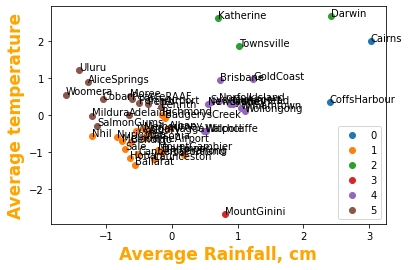

In [70]:
np_array_df = np.array(df)
annotations = df.index
for i in labels:
    plt.scatter(np_array_df[label == i, 0], np_array_df[label == i, 1], label = i)
for i, label in enumerate(annotations):
    plt.annotate(label, (np_array_df[i,0], np_array_df[i,1]))
    
plt.xlabel('Average Rainfall, cm', fontweight='bold', color='orange', fontsize='17', horizontalalignment='center')
plt.ylabel('Average temperature',fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
plt.legend()
plt.show()